## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data set from the previous exercise

In [2]:
# Read the CSV file full merged
df = pd.read_csv('Full grouped3.csv')

# Display the DataFrame
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,AVGTemperature (°C),_merge,bike_rides_daily,merge_2
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01,2.0,both,592,both
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01,2.0,both,592,both
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01,2.0,both,592,both
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01,2.0,both,592,both
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01,2.0,both,592,both


## Colomn chart
## Trying out some visualization using seaborn - Member_casual 

<Axes: xlabel='member_casual', ylabel='count'>

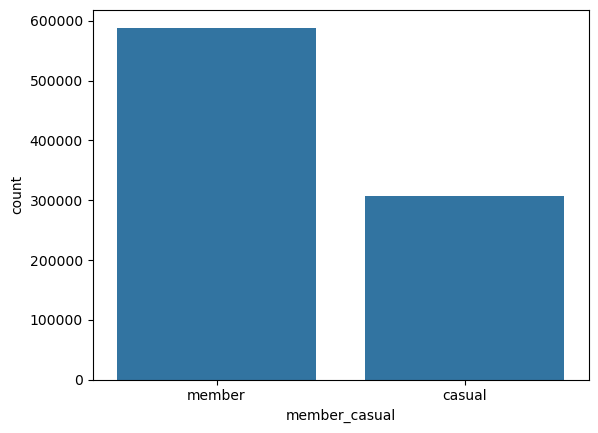

In [3]:
sns.countplot(data = df, x = 'member_casual')

## Observation

From the above graph, I can see a simple graph created using a simple line of code which is simple to interpret and understand. I also see that the color is the same for both bars.

C:\Users\25670\AppData\Local\Temp\ipykernel_3732\3495731283.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='member_casual', palette='Set2')


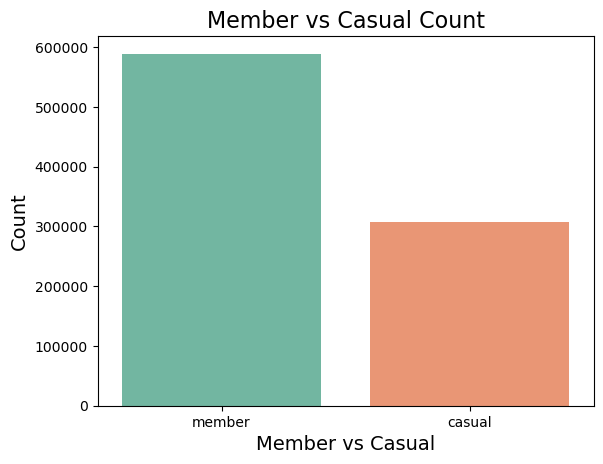

In [4]:
# Create a count plot with a color palette
sns.countplot(data=df, x='member_casual', palette='Set2')

# Add title and labels
plt.title("Member vs Casual Count", fontsize=16)
plt.xlabel("Member vs Casual", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Display the plot
plt.show()


## Observation

Compared to the first bar chart, this one has a different color per bar, making it more appealing to the eyes. Therefore this is a better choice than the first chart with only one color.

## Bar Chart

## Creating a bar chart of the top 20 starting stations frequencies

In [8]:
# Add a new column 'value' with all values set to 1
df['value'] = 1

# Group by 'from_station_name' and count occurrences (by summing the 'value' column)
df_t = df.groupby('start_station_name')['value'].sum().reset_index()

# Get the top 20 stations with the highest counts
top20 = df_t.nlargest(20, 'value')

# Display the top 20
top20


,start_station_name,value
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


C:\Users\25670\AppData\Local\Temp\ipykernel_3732\1834391547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top20, x='value', y='start_station_name', palette="Blues_r")


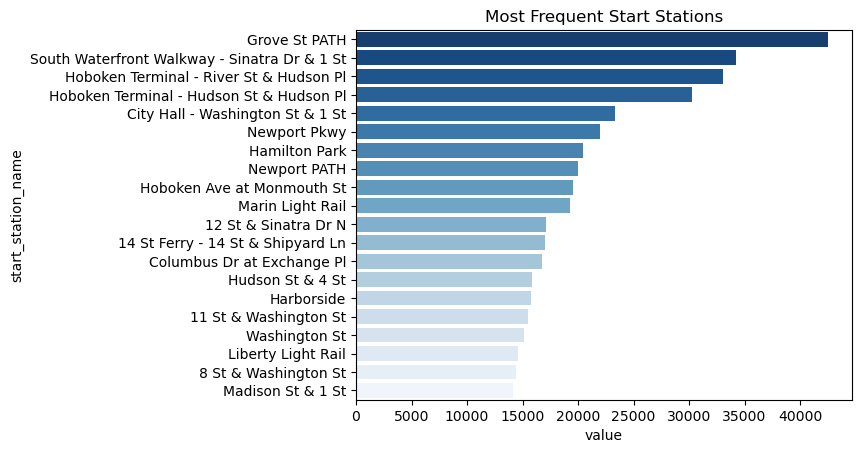

In [9]:
# Create the barplot with the "Blues_r" color palette
sns.barplot(data=top20, x='value', y='start_station_name', palette="Blues_r")

# Add a title to the plot
plt.title("Most Frequent Start Stations")

# Display the plot
plt.show()


## Observation

To enhance the visual clarity of the chart, I opted for an inverted blue color palette instead of the default one. The original palette had too many colors, which made the chart visually overwhelming and resembled a rainbow. By using a darker blue color palette with the palette parameter directly inside the plotting function, I was able to create a more refined and readable chart. This approach ensures that the bars with the highest frequencies are filled with deeper shades of blue, effectively emphasizing the most frequent categories, while maintaining a clean and professional aesthetic.

## Line Plots
## Recreate the dual-axis line plot from the previous Exercise using seaborn

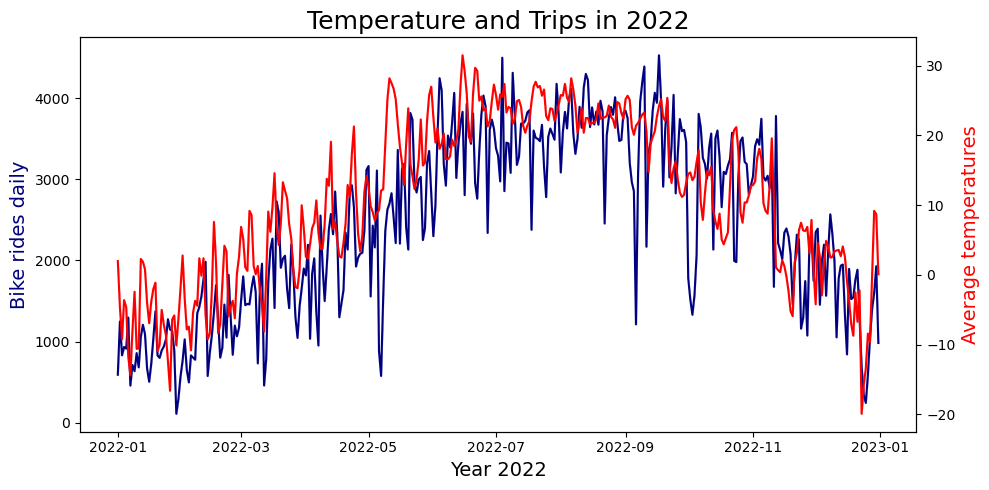

In [10]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Create figure and axis objects with subplots()
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides daily using Seaborn lineplot
sns.lineplot(data=df, x='date', y='bike_rides_daily', color='navy', ax=ax)

# Set labels for the first axis
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)

# Create the second y-axis for temperatures
ax2 = ax.twinx()

# Plot temperatures on the second y-axis using Seaborn lineplot
sns.lineplot(data=df, x='date', y='AVGTemperature (°C)', color='red', ax=ax2)

# Set label for the second axis
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

# Add title
plt.title('Temperature and Trips in 2022', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()

## Observation

Upon reviewing both the dual-axis plots in Exercise 2.3 and the current one using sns.lineplot(), I noticed that the fundamental difference between the two lies primarily in the choice of plot function—sns.lineplot() versus other plot types. Despite the use of sns.lineplot(), the dual-axis structure remains consistent, with both axes representing different data variables. The primary distinction, therefore, is the visualization method itself, which leverages sns.lineplot() to plot continuous data, providing a smooth, clear representation of trends over time or across categories.

## A box plot of one of the categorical variables in your data set- member_casual
## What does this plot tell you about the variable? 
## Write down a 3 to 5-sentence analysis of the elements of the box plot.

C:\Users\25670\AppData\Local\Temp\ipykernel_3732\1693093113.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_casual', y='bike_rides_daily', palette='Set2')


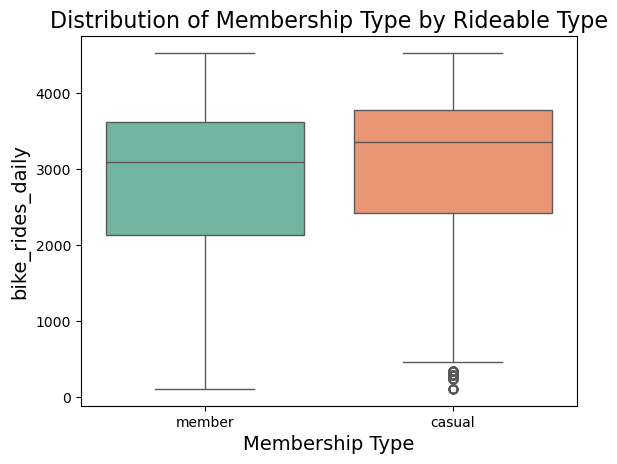

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the variable of interest (e.g., 'ride_duration') across 'member_casual' categories
sns.boxplot(data=df, x='member_casual', y='bike_rides_daily', palette='Set2')

# Add title and labels
plt.title('Distribution of Membership Type by Rideable Type', fontsize=16)
plt.xlabel('Membership Type', fontsize=14)
plt.ylabel('bike_rides_daily', fontsize=14)

# Display the plot
plt.show()


## Observation

The "member" box plot reveals a tight clustering of values around the median, with the interquartile range (IQR) appearing relatively narrow. This suggests that members exhibit a highly consistent pattern of daily bike usage, likely due to the habitual nature of their riding behavior. Members, as part of a subscription or regular use model, may be more inclined to use the bike-sharing service for daily commuting or other routine activities. The absence of outliers further reinforces the idea that their usage is predictable and reliable, with daily bike rides clustering around a typical range of values. 

In contrast, the "casual" box plot exhibits a much wider distribution, with a broader interquartile range (IQR) and several outliers. This suggests that casual riders have more variable and irregular bike usage patterns, likely driven by occasional usage rather than a consistent routine.

## FacetGrids

## Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. 
## Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

In [11]:
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'AVGTemperature (°C)', '_merge',
       'bike_rides_daily', 'merge_2', 'value'],
      dtype='object')


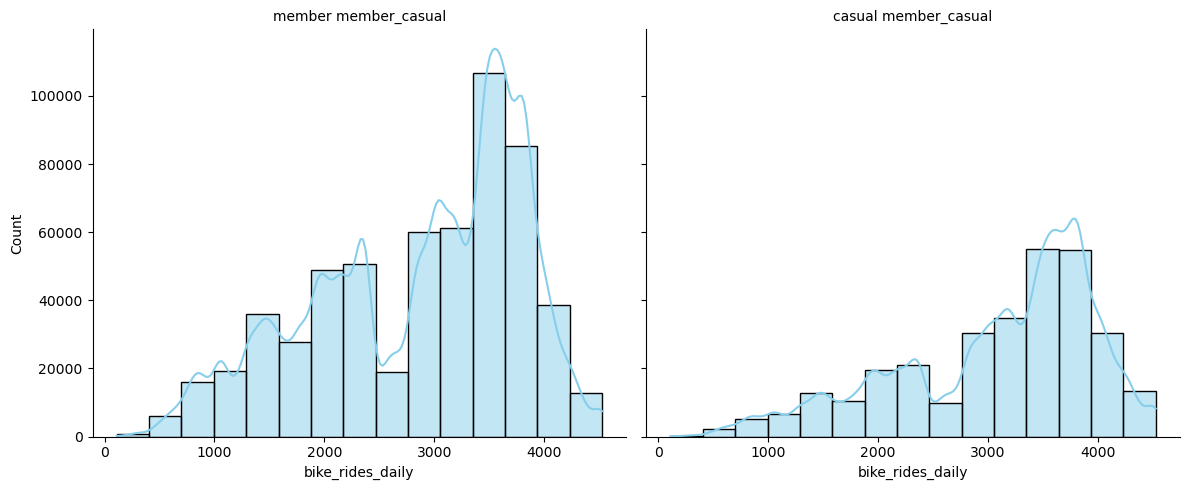

In [15]:
# Create a FacetGrid with 'gender' column and map histograms for 'age'
grid = sns.FacetGrid(df, col="member_casual", height=5, aspect=1.2)

# Map the histogram plot for the 'age' column
grid.map(sns.histplot, "bike_rides_daily", bins=15, kde=True, color="skyblue")

# Add titles and adjust labels
grid.set_axis_labels("bike_rides_daily", "Count")
grid.set_titles(col_template="{col_name} member_casual")

# Display the plot
plt.tight_layout()
plt.show()


## Observation

The FacetGrid has successfully created separate histograms for each category of member_casual ("Member" and "Casual"), allowing for a clear comparison of the distribution of daily bike rides between these two user groups. Upon analyzing the plots, it is evident that members tend to exhibit more consistent and regular daily usage of the bike-sharing service. This suggests that members, possibly using the bikes for commuting or as part of a routine, have a more predictable and frequent pattern of usage across days.

On the other hand, casual riders show more sporadic and intermittent usage, as indicated by the broader spread of their distribution. Casual riders may use the service on an ad-hoc basis, likely influenced by external factors such as weekends, holidays, or special events. This difference in usage patterns highlights a key distinction between the two groups: members are more likely to rely on the bike-sharing service consistently, while casual riders tend to have more irregular or occasional usage, resulting in a more varied and less predictable distribution..

## Theme for all plots, and think of the style and the palette you want to use

Theme Selection
The Seaborn library provides several built-in themes to customize the overall appearance of your plots, such as darkgrid, whitegrid, dark, white, and ticks. I choose whitegrid since it provides a clean background with grid lines, making it easier to compare data, and it's well-suited for statistical plots like box plots and line plots.

Style Selection
The style parameter controls the aesthetics of the plot elements, such as background color, grid appearance, and axes. The options for style are:

seaborn-white: White background with minimal styling.
seaborn-dark: Dark background with minimal styling.
seaborn-ticks: More minimalist style with ticks on axes.
I choose seaborn-ticks, as it provides a clean, modern look with a focus on clarity and simplicity.

Pick a Palette
The palette controls the color scheme of your plots. Seaborn provides several built-in palettes. Here are some great options:

deep (default): A balanced, distinct color palette that works for most use cases.
pastel: Soft, muted colors, useful when you want to avoid overwhelming the viewer.
Set2: A set of pastel colors that’s especially good for distinguishing categorical data.
Blues: A gradient palette of blues, useful when you need a range of shades of one color.
coolwarm: A diverging palette, suitable for showing data that has a meaningful midpoint (e.g., temperature).

I choose the deep palette. It provides clear and distinctive colors without overwhelming the viewer, making it ideal for both categorical and continuous data.


In [16]:
## Saving the df as a csv
df.to_csv('Full grouped4.csv', index=False)